In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
anpc = pd.read_csv('data_with_incidentes.csv')

In [51]:
anpc.head()

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,Grouped
0,2016150002576,09/01/2016 14:02:00,09/01/2016 17:30:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,Assistência e Prevenção
1,2016010098470,10/01/2016 00:30:00,NaN,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,"40,6927855","-8,479686736",0.0,0.0,0.0,0.0,Assistência e Prevenção
2,2016020002249,24/01/2016 18:57:00,24/01/2016 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0,Assistência e Prevenção
3,2016050041560,30/01/2016 23:38:00,NaN,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,CASTELO BRANCO,VILA DE REI,Vila de Rei,Vila de Rei,"39,6684201","-8,146938534",1.0,2.0,0.0,0.0,Assistência e Prevenção
4,2016020003825,13/02/2016 00:10:00,13/02/2016 01:35:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0,Assistência e Prevenção


In [52]:
anpc['DataOcorrencia'] = pd.to_datetime(anpc['DataOcorrencia'], errors='coerce')
anpc['DataFechoOperacional'] = pd.to_datetime(anpc['DataFechoOperacional'], errors='coerce')

data = anpc.dropna(subset=['DataOcorrencia', 'DataFechoOperacional'])

In [53]:
data.head()

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,Grouped
0,2016150002576,2016-09-01 14:02:00,2016-09-01 17:30:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,Assistência e Prevenção
2,2016020002249,2016-01-24 18:57:00,2016-01-24 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0,Assistência e Prevenção
4,2016020003825,2016-02-13 00:10:00,2016-02-13 01:35:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0,Assistência e Prevenção
5,2016110048171,2016-03-14 19:34:00,2016-03-14 21:25:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,LISBOA,MAFRA,Encarnação,Barril,"39,05063999","-9,403775952",1.0,2.0,0.0,0.0,Assistência e Prevenção
6,2016180014340,2016-03-14 19:19:00,2016-03-14 22:25:00,Riscos Mistos / Incêndios Rurais / Povoamento ...,Encerrada,VISEU,RESENDE,São Martinho de Mouros,SÃO MARTINHO DE MOUROS,"41,100792","-7,895058",2.0,7.0,0.0,0.0,Incêndios


## Data Visualization

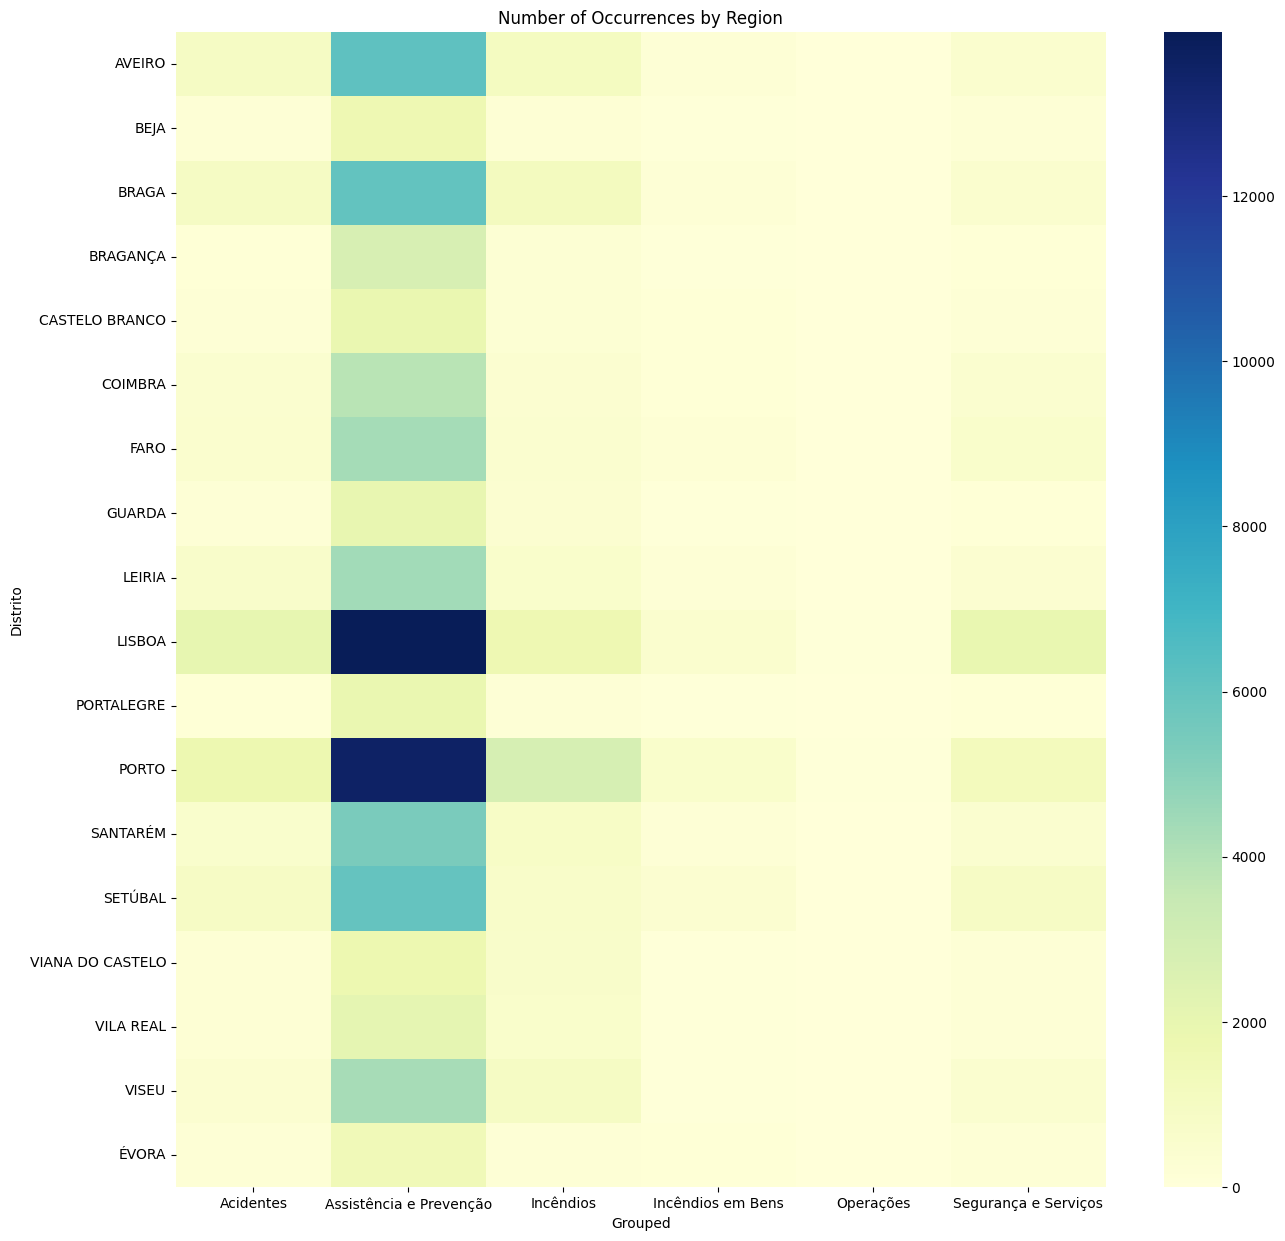

In [54]:
occurrences_by_region = data.groupby(['Distrito','Grouped']).size().reset_index(name='Occurrences')
occurrences_by_region = occurrences_by_region.pivot_table(index=['Distrito'], columns='Grouped', values='Occurrences').fillna(0)

plt.figure(figsize=(15, 15))
sns.heatmap(occurrences_by_region, cmap="YlGnBu")
plt.title("Number of Occurrences by Region")
plt.show()

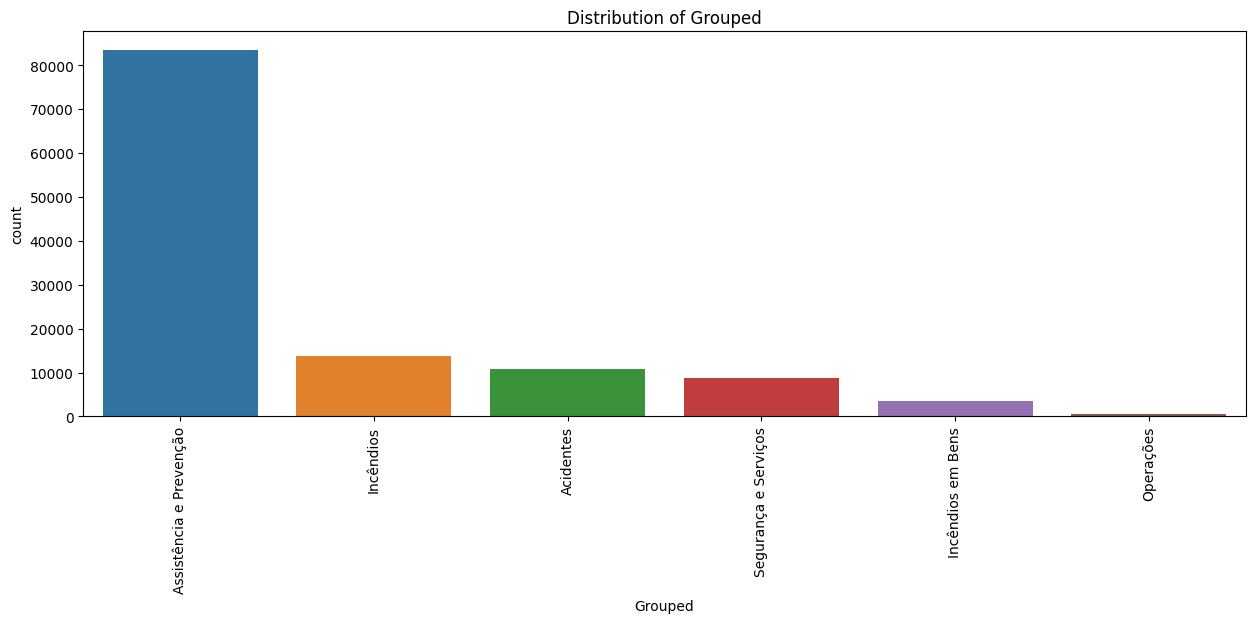

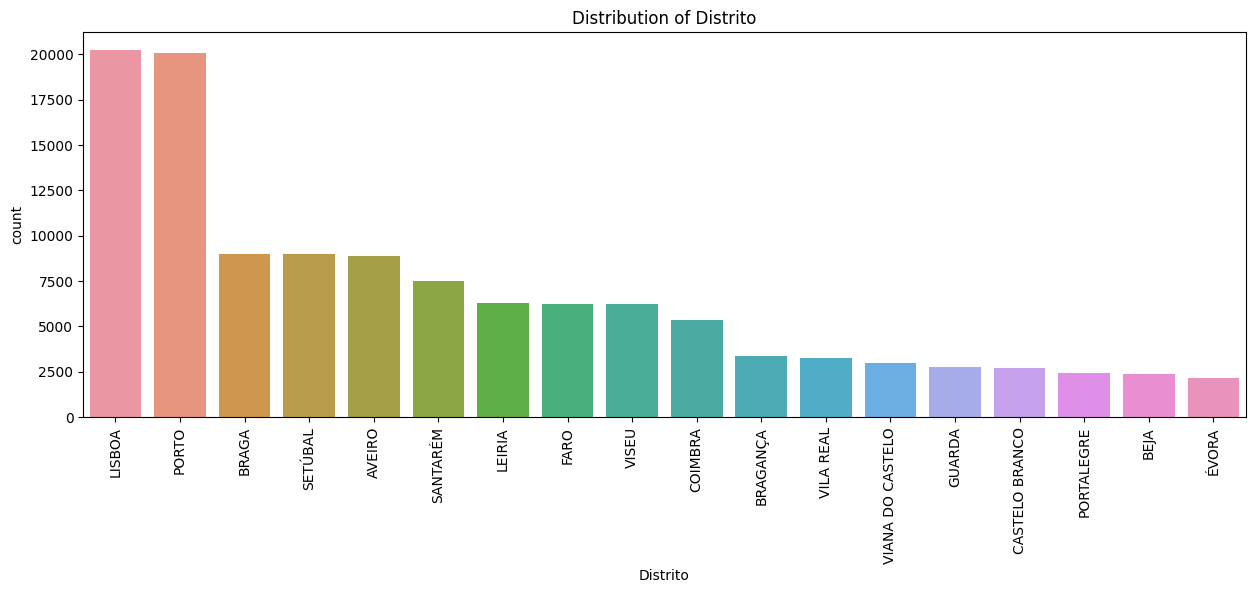

In [55]:
def plot_categorical_distribution(column):
    plt.figure(figsize=(15, 5))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {column}")
    plt.show()
categorical_columns = ['Grouped','Distrito']
for column in categorical_columns:
    plot_categorical_distribution(column)

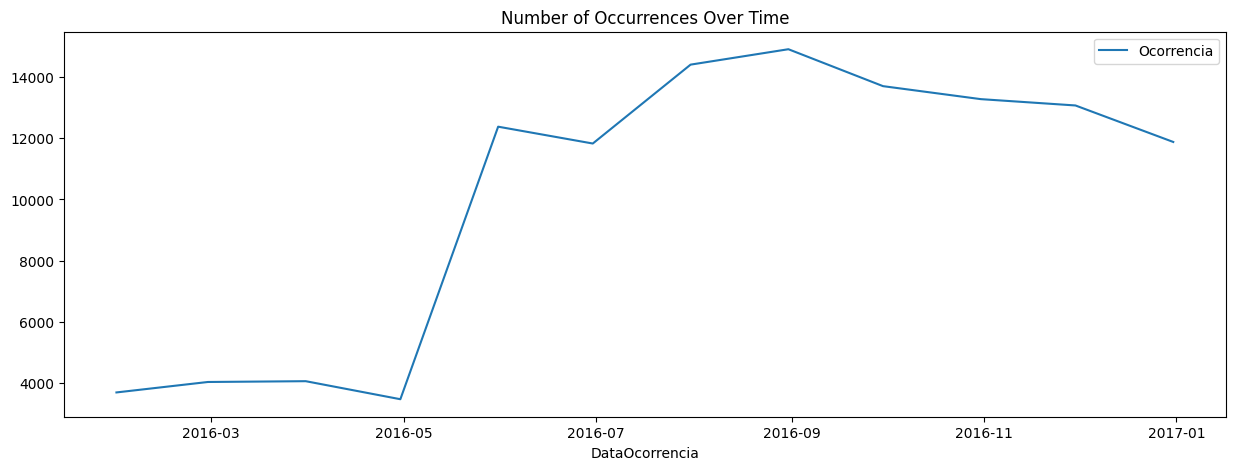

In [56]:
occurrences_per_month = data[['DataOcorrencia']].copy()
occurrences_per_month['DataOcorrencia'] = pd.to_datetime(occurrences_per_month['DataOcorrencia'])
occurrences_per_month = occurrences_per_month.set_index('DataOcorrencia')
occurrences_per_month['Ocorrencia'] = 1
occurrences_per_month = occurrences_per_month.resample('M').sum()

plt.figure(figsize=(15, 5))
sns.lineplot(data=occurrences_per_month)
plt.title("Number of Occurrences Over Time")
plt.show()

In [57]:
data['DataOcorrencia'] = pd.to_datetime(data['DataOcorrencia'])
data['DataFechoOperacional'] = pd.to_datetime(data['DataFechoOperacional'])
data['DuracaoEvento'] = (data['DataFechoOperacional'] - data['DataOcorrencia']).dt.total_seconds()/3600
data['AnoOcorrencia'] = data['DataOcorrencia'].dt.year
data['MesOcorrencia'] = data['DataOcorrencia'].dt.month
data['DiaOcorrencia'] = data['DataOcorrencia'].dt.day
data['HoraOcorrencia'] = data['DataOcorrencia'].dt.hour

data = data.drop(columns=['DataOcorrencia', 'DataFechoOperacional'])

/tmp/ipykernel_16752/1566074172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DataOcorrencia'] = pd.to_datetime(data['DataOcorrencia'])
/tmp/ipykernel_16752/1566074172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DataFechoOperacional'] = pd.to_datetime(data['DataFechoOperacional'])
/tmp/ipykernel_16752/1566074172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [58]:
data.head()

,Numero,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,Grouped,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,HoraOcorrencia
0,2016150002576,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,Assistência e Prevenção,3.466667,2016,9,1,14
2,2016020002249,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0,Assistência e Prevenção,0.933333,2016,1,24,18
4,2016020003825,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0,Assistência e Prevenção,1.416667,2016,2,13,0
5,2016110048171,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,LISBOA,MAFRA,Encarnação,Barril,"39,05063999","-9,403775952",1.0,2.0,0.0,0.0,Assistência e Prevenção,1.850000,2016,3,14,19
6,2016180014340,Riscos Mistos / Incêndios Rurais / Povoamento ...,Encerrada,VISEU,RESENDE,São Martinho de Mouros,SÃO MARTINHO DE MOUROS,"41,100792","-7,895058",2.0,7.0,0.0,0.0,Incêndios,3.100000,2016,3,14,19


In [59]:
data = data.drop(columns=['Concelho', 'Freguesia', 'Natureza','Localidade','Numero'])

In [60]:
data = data.drop(columns=['EstadoOcorrencia'])

In [61]:
data.head()

,Distrito,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,Grouped,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,HoraOcorrencia
0,SETÚBAL,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,Assistência e Prevenção,3.466667,2016,9,1,14
2,BEJA,"37,71278977","-8,091107843",2.0,4.0,0.0,0.0,Assistência e Prevenção,0.933333,2016,1,24,18
4,BEJA,"37,6149714","-7,962115173",1.0,2.0,0.0,0.0,Assistência e Prevenção,1.416667,2016,2,13,0
5,LISBOA,"39,05063999","-9,403775952",1.0,2.0,0.0,0.0,Assistência e Prevenção,1.850000,2016,3,14,19
6,VISEU,"41,100792","-7,895058",2.0,7.0,0.0,0.0,Incêndios,3.100000,2016,3,14,19


In [62]:
categorical_columns = ['Grouped', 'Distrito']
data = pd.get_dummies(data, columns=categorical_columns)

In [63]:
data.head()

,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,...,Distrito_LEIRIA,Distrito_LISBOA,Distrito_PORTALEGRE,Distrito_PORTO,Distrito_SANTARÉM,Distrito_SETÚBAL,Distrito_VIANA DO CASTELO,Distrito_VILA REAL,Distrito_VISEU,Distrito_ÉVORA
0,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0,3.466667,2016,9,1,...,0,0,0,0,0,1,0,0,0,0
2,"37,71278977","-8,091107843",2.0,4.0,0.0,0.0,0.933333,2016,1,24,...,0,0,0,0,0,0,0,0,0,0
4,"37,6149714","-7,962115173",1.0,2.0,0.0,0.0,1.416667,2016,2,13,...,0,0,0,0,0,0,0,0,0,0
5,"39,05063999","-9,403775952",1.0,2.0,0.0,0.0,1.850000,2016,3,14,...,0,1,0,0,0,0,0,0,0,0
6,"41,100792","-7,895058",2.0,7.0,0.0,0.0,3.100000,2016,3,14,...,0,0,0,0,0,0,0,0,1,0


In [64]:
len(data.columns)

35

In [65]:
data['Latitude'] = data['Latitude'].str.replace(',', '.').astype(float)
data['Longitude'] = data['Longitude'].str.replace(',', '.').astype(float)

In [66]:
scaler = MinMaxScaler()
numerical_columns = ['Latitude', 'Longitude', 'DuracaoEvento']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [67]:
data.head()

,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,...,Distrito_LEIRIA,Distrito_LISBOA,Distrito_PORTALEGRE,Distrito_PORTO,Distrito_SANTARÉM,Distrito_SETÚBAL,Distrito_VIANA DO CASTELO,Distrito_VILA REAL,Distrito_VISEU,Distrito_ÉVORA
0,0.000040,0.998153,1.0,3.0,0.0,0.0,0.479019,2016,9,1,...,0,0,0,0,0,1,0,0,0,0
2,0.000017,0.998249,2.0,4.0,0.0,0.0,0.478863,2016,1,24,...,0,0,0,0,0,0,0,0,0,0
4,0.000015,0.998263,1.0,2.0,0.0,0.0,0.478893,2016,2,13,...,0,0,0,0,0,0,0,0,0,0
5,0.000049,0.998110,1.0,2.0,0.0,0.0,0.478919,2016,3,14,...,0,1,0,0,0,0,0,0,0,0
6,0.000099,0.998270,2.0,7.0,0.0,0.0,0.478996,2016,3,14,...,0,0,0,0,0,0,0,0,1,0


In [68]:
# set values of 'NumeroMeiosTerrestresEnvolvidos' to 6 where the original value was >= 6
data.loc[data['NumeroMeiosTerrestresEnvolvidos'] >= 6, 'NumeroMeiosTerrestresEnvolvidos'] = 6


In [81]:
data.head()

,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,MesOcorrencia,DiaOcorrencia,Grouped_Acidentes,Grouped_Assistência e Prevenção,Grouped_Incêndios,Grouped_Incêndios em Bens,...,Distrito_LEIRIA,Distrito_LISBOA,Distrito_PORTALEGRE,Distrito_PORTO,Distrito_SANTARÉM,Distrito_SETÚBAL,Distrito_VIANA DO CASTELO,Distrito_VILA REAL,Distrito_VISEU,Distrito_ÉVORA
0,0.000040,0.998153,1.0,3.0,9,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.000017,0.998249,2.0,4.0,1,24,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000015,0.998263,1.0,2.0,2,13,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.000049,0.998110,1.0,2.0,3,14,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0.000099,0.998270,2.0,7.0,3,14,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
# set values of 'NumeroOperacionaisTerrestresEnvolvidos' to 13 where the original value was >= 13
data.loc[data['NumeroOperacionaisTerrestresEnvolvidos'] >= 13, 'NumeroOperacionaisTerrestresEnvolvidos'] = 13

In [80]:
data=data.drop("NumeroMeiosAereosEnvolvidos",axis=1)
data=data.drop("NumeroOperacionaisAereosEnvolvidos",axis=1)
data=data.drop("DuracaoEvento",axis=1)
data=data.drop("AnoOcorrencia",axis=1)
data=data.drop("HoraOcorrencia",axis=1)

In [82]:
data=data.drop("Latitude",axis=1)
data=data.drop("Longitude",axis=1)

In [128]:
data

,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,MesOcorrencia,DiaOcorrencia,Grouped_Acidentes,Grouped_Assistência e Prevenção,Grouped_Incêndios,Grouped_Incêndios em Bens,Grouped_Operações,Grouped_Segurança e Serviços,...,Distrito_LEIRIA,Distrito_LISBOA,Distrito_PORTALEGRE,Distrito_PORTO,Distrito_SANTARÉM,Distrito_SETÚBAL,Distrito_VIANA DO CASTELO,Distrito_VILA REAL,Distrito_VISEU,Distrito_ÉVORA
0,1.0,3.0,9,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,4.0,1,24,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2.0,2,13,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,2.0,3,14,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,2.0,7.0,3,14,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121162,1.0,2.0,12,31,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121163,1.0,2.0,12,31,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121165,1.0,2.0,12,31,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
121166,3.0,8.0,12,31,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# group the data by every column except 'NumeroMeiosTerrestresEnvolvidos' and 'NumeroOperacionaisTerrestresEnvolvidos',
# and calculate the average, maximum, and minimum values of the other columns
grouped_data = data.groupby(data.columns.difference(['NumeroMeiosTerrestresEnvolvidos', 'NumeroOperacionaisTerrestresEnvolvidos']).tolist()).agg(['max']).reset_index()

In [130]:
grouped_data

,DiaOcorrencia,Distrito_AVEIRO,Distrito_BEJA,Distrito_BRAGA,Distrito_BRAGANÇA,Distrito_CASTELO BRANCO,Distrito_COIMBRA,Distrito_FARO,Distrito_GUARDA,Distrito_LEIRIA,...,Distrito_ÉVORA,Grouped_Acidentes,Grouped_Assistência e Prevenção,Grouped_Incêndios,Grouped_Incêndios em Bens,Grouped_Operações,Grouped_Segurança e Serviços,MesOcorrencia,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos
,,,,,,,,,,,...,,,,,,,,,max,max
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,9,1.0,3.0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4.0,13.0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,6.0,13.0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,8,1.0,3.0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,7,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16116,31,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,5,2.0,5.0
16117,31,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,7,1.0,3.0
16118,31,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,8,3.0,7.0


In [131]:
# flatten the multi-level column index
grouped_data.columns = ['_'.join(col).strip() for col in grouped_data.columns.values]

In [165]:
grouped_data

,DiaOcorrencia_,Distrito_AVEIRO_,Distrito_BEJA_,Distrito_BRAGA_,Distrito_BRAGANÇA_,Distrito_CASTELO BRANCO_,Distrito_COIMBRA_,Distrito_FARO_,Distrito_GUARDA_,Distrito_LEIRIA_,...,Distrito_ÉVORA_,Grouped_Acidentes_,Grouped_Assistência e Prevenção_,Grouped_Incêndios_,Grouped_Incêndios em Bens_,Grouped_Operações_,Grouped_Segurança e Serviços_,MesOcorrencia_,NumeroMeiosTerrestresEnvolvidos_max,NumeroOperacionaisTerrestresEnvolvidos_max
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,9,1.0,3.0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4.0,13.0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,6.0,13.0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,8,1.0,3.0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,7,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16116,31,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,5,2.0,5.0
16117,31,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,7,1.0,3.0
16118,31,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,8,3.0,7.0
16119,31,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,10,4.0,11.0


In [182]:
# group the data by every column except 'NumeroMeiosTerrestresEnvolvidos' and 'NumeroOperacionaisTerrestresEnvolvidos',
# and calculate the average, maximum, and minimum values of the other columns
grouped_data2 = grouped_data.groupby(grouped_data.columns.difference(['NumeroMeiosTerrestresEnvolvidos_max', 'NumeroOperacionaisTerrestresEnvolvidos_max','DiaOcorrencia_']).tolist()).agg(['max','mean','min']).reset_index()

In [183]:
grouped_data2

Distrito_AVEIRO_ Distrito_BEJA_ Distrito_BRAGANÇA_ Distrito_BRAGA_  \
                                                                          
0                   0              0                  0               0   
1                   0              0                  0               0   
2                   0              0                  0               0   
3                   0              0                  0               0   
4                   0              0                  0               0   
...               ...            ...                ...             ...   
1203                1              0                  0               0   
1204                1              0                  0               0   
1205                1              0                  0               0   
1206                1              0                  0               0   
1207                1              0                  0               0   

     Distrito_CASTELO BRANCO_ Distrito_COIMBRA_ Distrito_FARO_  \
                                                                 
0                           0                 0              0   
1                           0                 0              0   
2                           0                 0              0   
3                           0                 0              0   
4                           0                 0              0   
...                       ...               ...            ...   
1203                        0                 0              0   
1204                        0                 0              0   
1205                        0                 0              0   
1206                        0                 0              0   
1207                        0                 0              0   

     Distrito_GUARDA_ Distrito_LEIRIA_ Distrito_LISBOA_  ... MesOcorrencia_  \
                                                         ...                  
0                   0                0                0  ...              1   
1                   0                0                0  ...              2   
2                   0                0                0  ...              3   
3                   0                0                0  ...              4   
4                   0                0                0  ...              5   
...               ...              ...              ...  ...            ...   
1203                0                0                0  ...              8   
1204                0                0                0  ...              9   
1205                0                0                0  ...             10   
1206                0                0                0  ...             11   
1207                0                0                0  ...             12   

     DiaOcorrencia_                NumeroMeiosTerrestresEnvolvidos_max  \
                max       mean min                                 max   
0                10   9.000000   8                                 2.0   
1                10   7.800000   5                                 3.0   
2                12   9.666667   6                                 2.0   
3                19  11.666667   7                                 2.0   
4                28  18.000000   6                                 3.0   
...             ...        ...  ..                                 ...   
1203             31  18.250000   6                                 6.0   
1204             30  17.347826   6                                 6.0   
1205             31  18.280000   6                                 6.0   
1206             30  17.500000   5                                 6.0   
1207             31  18.153846   5                                 6.0   

                    NumeroOperacionaisTerrestresEnvolvidos_max                 
          mean  min                                        max      mean  min  
0     1.000000  0.0

In [184]:
grouped_data2=grouped_data2.drop("DiaOcorrencia_", axis=1)

/tmp/ipykernel_16752/2848552038.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grouped_data2=grouped_data2.drop("DiaOcorrencia_", axis=1)


In [185]:
grouped_data2

Distrito_AVEIRO_ Distrito_BEJA_ Distrito_BRAGANÇA_ Distrito_BRAGA_  \
                                                                          
0                   0              0                  0               0   
1                   0              0                  0               0   
2                   0              0                  0               0   
3                   0              0                  0               0   
4                   0              0                  0               0   
...               ...            ...                ...             ...   
1203                1              0                  0               0   
1204                1              0                  0               0   
1205                1              0                  0               0   
1206                1              0                  0               0   
1207                1              0                  0               0   

     Distrito_CASTELO BRANCO_ Distrito_COIMBRA_ Distrito_FARO_  \
                                                                 
0                           0                 0              0   
1                           0                 0              0   
2                           0                 0              0   
3                           0                 0              0   
4                           0                 0              0   
...                       ...               ...            ...   
1203                        0                 0              0   
1204                        0                 0              0   
1205                        0                 0              0   
1206                        0                 0              0   
1207                        0                 0              0   

     Distrito_GUARDA_ Distrito_LEIRIA_ Distrito_LISBOA_  ...  \
                                                         ...   
0                   0                0                0  ...   
1                   0                0                0  ...   
2                   0                0                0  ...   
3                   0                0                0  ...   
4                   0                0                0  ...   
...               ...              ...              ...  ...   
1203                0                0                0  ...   
1204                0                0                0  ...   
1205                0                0                0  ...   
1206                0                0                0  ...   
1207                0                0                0  ...   

     Grouped_Incêndios_ Grouped_Operações_ Grouped_Segurança e Serviços_  \
                                                                           
0                     0                  0                             1   
1                     0                  0                             1   
2                     0                  0                             1   
3                     0                  0                             1   
4                     0                  0                             1   
...                 ...                ...                           ...   
1203                  0                  0                             0   
1204                  0                  0                             0   
1205                  0                  0                             0   
1206                  0                  0                             0   
1207                  0                  0                             0   

     MesOcorrencia_ NumeroMeiosTerrestresEnvolvidos_max                 \
                                                    max      mean  min   
0                 1                                 2.0  1.000000  0.0   
1                 2                                 3.0  2.000000  1.0   
2                 3                                 

In [180]:
grouped_data2_flat=grouped_data2.columns.to_flat_index()

In [181]:
grouped_data2_flat

Index([                              ('Distrito_AVEIRO_', ''),
                                       ('Distrito_BEJA_', ''),
                                   ('Distrito_BRAGANÇA_', ''),
                                      ('Distrito_BRAGA_', ''),
                             ('Distrito_CASTELO BRANCO_', ''),
                                    ('Distrito_COIMBRA_', ''),
                                       ('Distrito_FARO_', ''),
                                     ('Distrito_GUARDA_', ''),
                                     ('Distrito_LEIRIA_', ''),
                                     ('Distrito_LISBOA_', ''),
                                 ('Distrito_PORTALEGRE_', ''),
                                      ('Distrito_PORTO_', ''),
                                   ('Distrito_SANTARÉM_', ''),
                                    ('Distrito_SETÚBAL_', ''),
                           ('Distrito_VIANA DO CASTELO_', ''),
                                  ('Distrito_VILA REAL_

In [186]:
# flatten the multi-level column index
grouped_data2.columns = ['_'.join(col).strip() for col in grouped_data2.columns.to_flat_index()]

In [187]:
grouped_data2

,Distrito_AVEIRO__,Distrito_BEJA__,Distrito_BRAGANÇA__,Distrito_BRAGA__,Distrito_CASTELO BRANCO__,Distrito_COIMBRA__,Distrito_FARO__,Distrito_GUARDA__,Distrito_LEIRIA__,Distrito_LISBOA__,...,Grouped_Incêndios__,Grouped_Operações__,Grouped_Segurança e Serviços__,MesOcorrencia__,NumeroMeiosTerrestresEnvolvidos_max_max,NumeroMeiosTerrestresEnvolvidos_max_mean,NumeroMeiosTerrestresEnvolvidos_max_min,NumeroOperacionaisTerrestresEnvolvidos_max_max,NumeroOperacionaisTerrestresEnvolvidos_max_mean,NumeroOperacionaisTerrestresEnvolvidos_max_min
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,2.0,1.000000,0.0,4.0,2.000000,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,3.0,2.000000,1.0,9.0,4.400000,2.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3,2.0,1.666667,1.0,7.0,4.666667,3.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,4,2.0,2.000000,2.0,7.0,5.000000,4.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,5,3.0,2.181818,1.0,9.0,5.181818,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1,0,0,0,0,0,0,0,0,0,...,0,0,0,8,6.0,3.041667,1.0,13.0,7.125000,2.0
1204,1,0,0,0,0,0,0,0,0,0,...,0,0,0,9,6.0,3.347826,1.0,13.0,8.086957,2.0
1205,1,0,0,0,0,0,0,0,0,0,...,0,0,0,10,6.0,3.600000,1.0,13.0,8.960000,2.0
1206,1,0,0,0,0,0,0,0,0,0,...,0,0,0,11,6.0,3.269231,1.0,13.0,7.807692,2.0


In [188]:
grouped_data2.to_csv("data/groupedby_distric_month_nature.csv")

In [107]:
data_group.head()

,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos
0,1.0,3.0
2,2.0,4.0
4,1.0,2.0
5,1.0,2.0
6,2.0,7.0
...,...,...
120485,6.0,13.0
120486,1.0,2.0
120502,1.0,2.0
120506,6.0,13.0


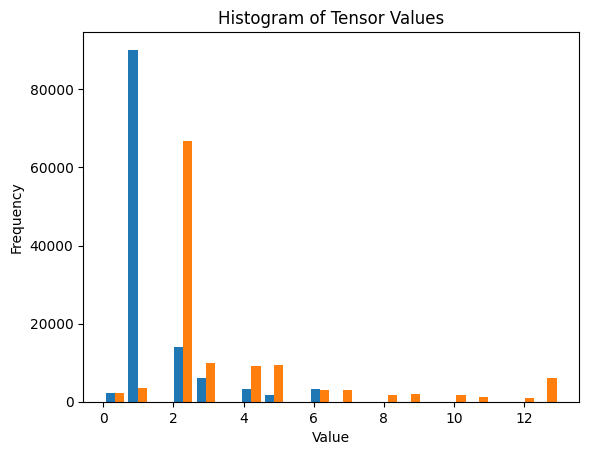

In [75]:
import matplotlib.pyplot as plt
# convert the tensor to a NumPy array

y_train_np = data[['NumeroMeiosTerrestresEnvolvidos','NumeroOperacionaisTerrestresEnvolvidos']]
y_train_np = y_train_np.to_numpy()

# create a histogram of the values
plt.hist(y_train_np, bins=20)
plt.title('Histogram of Tensor Values')
#plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
numerical_columns = ['NumeroMeiosTerrestresEnvolvidos', 'NumeroOperacionaisTerrestresEnvolvidos', 'NumeroMeiosAereosEnvolvidos', 'NumeroOperacionaisAereosEnvolvidos']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
data.head()

,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos,DuracaoEvento,AnoOcorrencia,MesOcorrencia,DiaOcorrencia,...,Distrito_LEIRIA,Distrito_LISBOA,Distrito_PORTALEGRE,Distrito_PORTO,Distrito_SANTARÉM,Distrito_SETÚBAL,Distrito_VIANA DO CASTELO,Distrito_VILA REAL,Distrito_VISEU,Distrito_ÉVORA
0,0.000040,0.998153,0.166667,0.230769,0.0,0.0,0.479019,2016,9,1,...,0,0,0,0,0,1,0,0,0,0
2,0.000017,0.998249,0.333333,0.307692,0.0,0.0,0.478863,2016,1,24,...,0,0,0,0,0,0,0,0,0,0
4,0.000015,0.998263,0.166667,0.153846,0.0,0.0,0.478893,2016,2,13,...,0,0,0,0,0,0,0,0,0,0
5,0.000049,0.998110,0.166667,0.153846,0.0,0.0,0.478919,2016,3,14,...,0,1,0,0,0,0,0,0,0,0
6,0.000099,0.998270,0.333333,0.538462,0.0,0.0,0.478996,2016,3,14,...,0,0,0,0,0,0,0,0,1,0


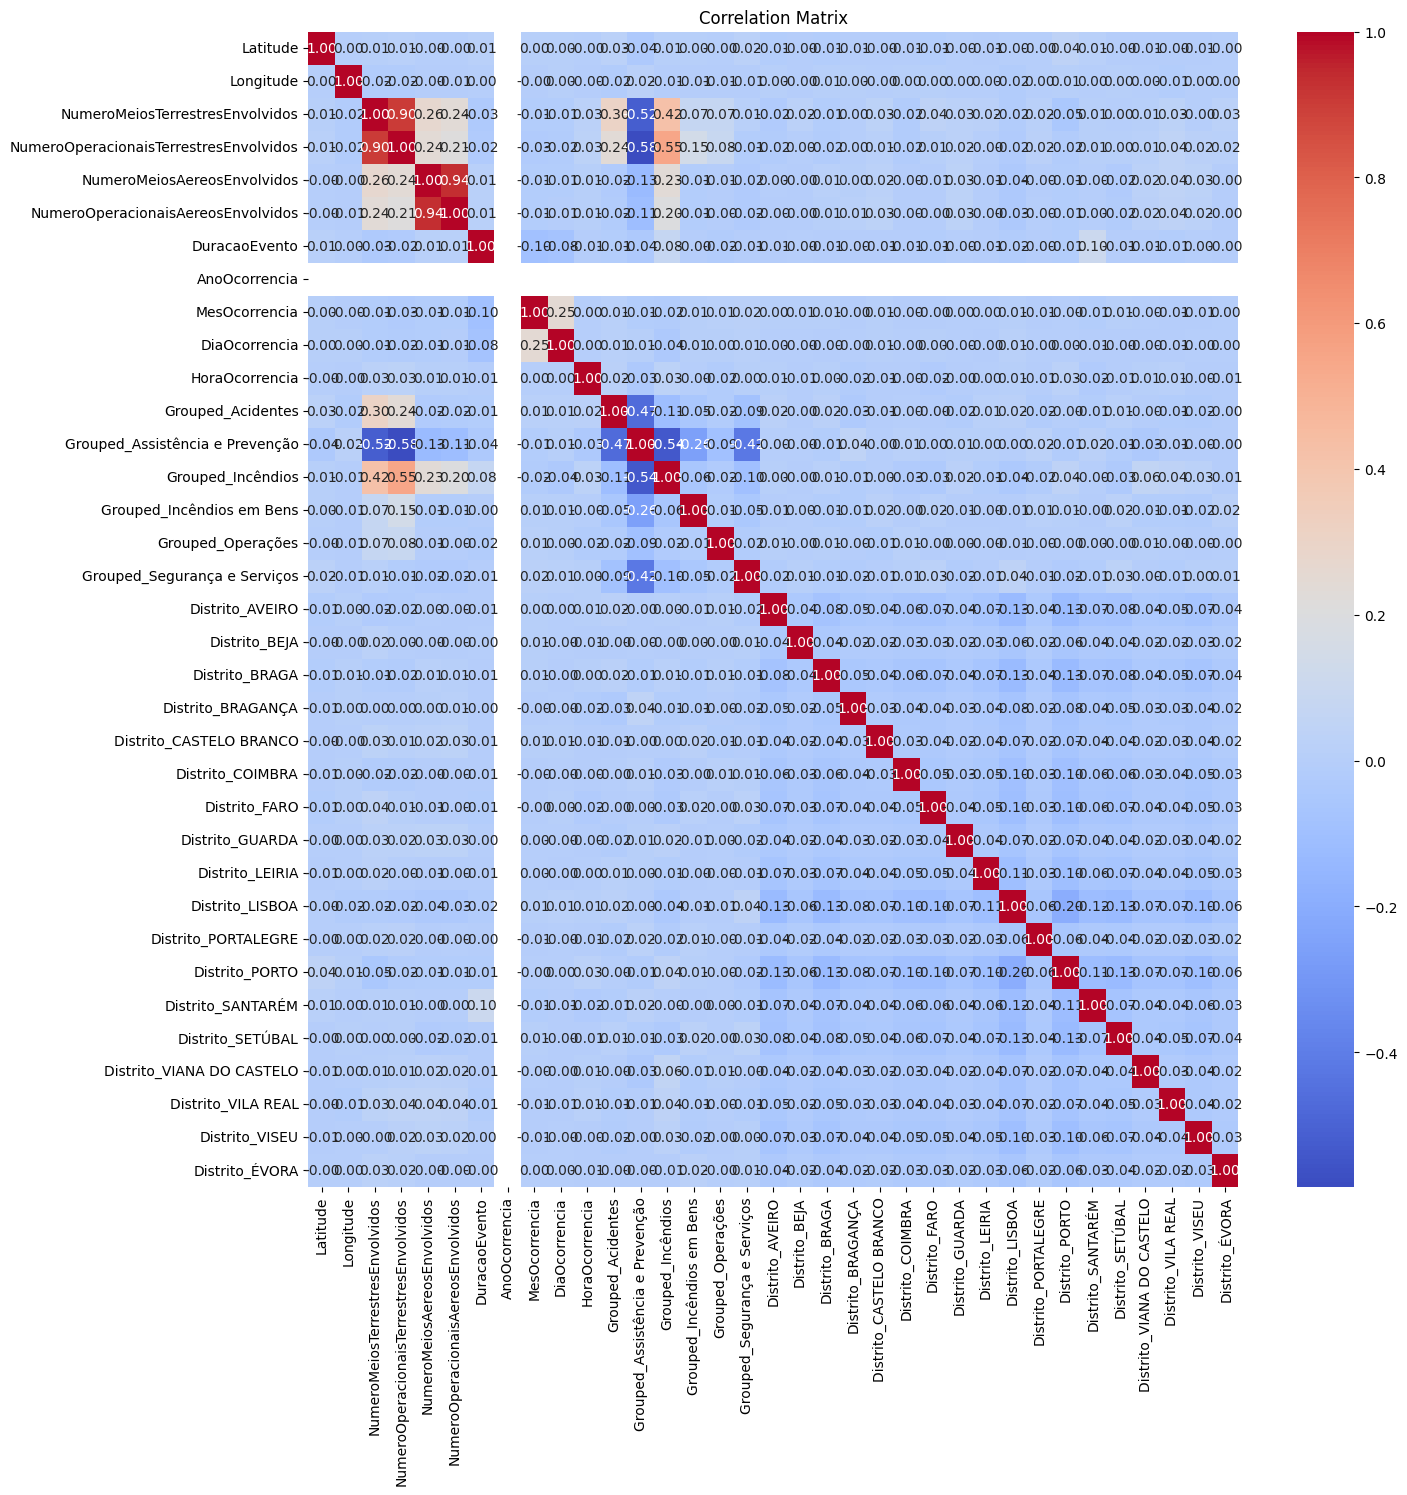

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data.to_csv("data/anpc-2016-preprocessed-normalized.csv")